# Udfordring: Analyse af tekst om Data Science

I dette eksempel skal vi lave en simpel øvelse, der dækker alle trin i en traditionel data science-proces. Du behøver ikke skrive nogen kode, du kan blot klikke på cellerne nedenfor for at udføre dem og observere resultatet. Som en udfordring opfordres du til at prøve denne kode med forskellige data.

## Mål

I denne lektion har vi diskuteret forskellige begreber relateret til Data Science. Lad os prøve at opdage flere relaterede begreber ved at lave noget **tekstmining**. Vi starter med en tekst om Data Science, udtrækker nøgleord fra den og forsøger derefter at visualisere resultatet.

Som tekst vil jeg bruge siden om Data Science fra Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Trin 1: Hente dataene

Første trin i enhver datavidenskabelig proces er at hente dataene. Vi vil bruge biblioteket `requests` til dette:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Trin 2: Transformering af data

Det næste trin er at omdanne dataene til en form, der er egnet til behandling. I vores tilfælde har vi downloadet HTML-kildekoden fra siden, og vi skal konvertere den til ren tekst.

Der er mange måder, dette kan gøres på. Vi vil bruge det enkleste indbyggede objekt, [HTMLParser](https://docs.python.org/3/library/html.parser.html), fra Python. Vi skal oprette en underklasse af `HTMLParser`-klassen og definere koden, der vil indsamle al tekst inde i HTML-tags, undtagen `<script>`- og `<style>`-tags.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Trin 3: Få indsigt

Det vigtigste trin er at omdanne vores data til en form, hvorfra vi kan udlede indsigt. I vores tilfælde ønsker vi at udtrække nøgleord fra teksten og se, hvilke nøgleord der er mest meningsfulde.

Vi vil bruge et Python-bibliotek kaldet [RAKE](https://github.com/aneesha/RAKE) til nøgleordsudtrækning. Først skal vi installere dette bibliotek, hvis det ikke allerede er til stede:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Den primære funktionalitet er tilgængelig fra `Rake`-objektet, som vi kan tilpasse ved hjælp af nogle parametre. I vores tilfælde vil vi indstille den minimale længde af et nøgleord til 5 tegn, den minimale frekvens af et nøgleord i dokumentet til 3, og det maksimale antal ord i et nøgleord til 2. Du er velkommen til at eksperimentere med andre værdier og observere resultatet.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Vi har fået en liste over termer sammen med deres tilknyttede vigtighedsgrad. Som du kan se, er de mest relevante discipliner, såsom maskinlæring og big data, til stede på listen i de øverste positioner.

## Trin 4: Visualisering af resultatet

Folk kan bedst fortolke data i visuel form. Derfor giver det ofte mening at visualisere dataene for at få nogle indsigter. Vi kan bruge `matplotlib`-biblioteket i Python til at plotte en simpel fordeling af nøgleordene med deres relevans:


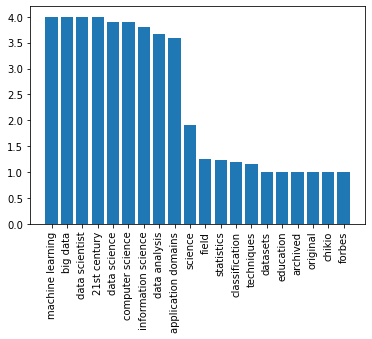

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Der er dog en endnu bedre måde at visualisere ordfrekvenser på - ved hjælp af **Word Cloud**. Vi skal installere et andet bibliotek for at plotte ordskyen fra vores nøgleordsliste.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-objektet er ansvarligt for at tage enten originaltekst eller en forudberegnet liste over ord med deres frekvenser og returnerer et billede, som derefter kan vises ved hjælp af `matplotlib`:


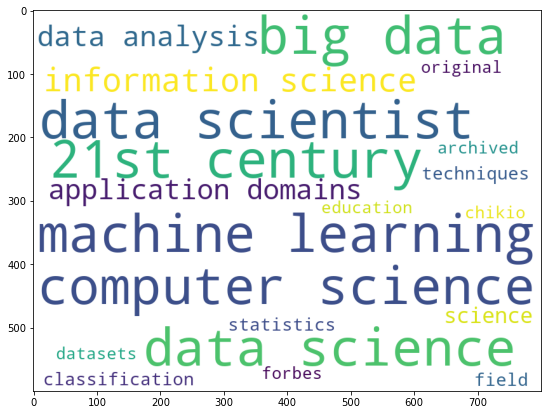

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Vi kan også indsætte den originale tekst i `WordCloud` - lad os se, om vi kan opnå et lignende resultat:


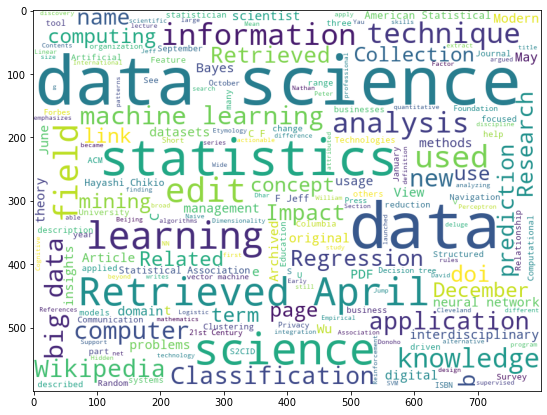

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Du kan se, at ordskyen nu ser mere imponerende ud, men den indeholder også en del støj (f.eks. irrelevante ord som `Retrieved on`). Derudover får vi færre nøgleord, der består af to ord, såsom *data scientist* eller *computer science*. Dette skyldes, at RAKE-algoritmen gør et langt bedre stykke arbejde med at udvælge gode nøgleord fra teksten. Dette eksempel illustrerer vigtigheden af dataforbehandling og -rensning, da et klart billede i sidste ende vil give os mulighed for at træffe bedre beslutninger.

I denne øvelse har vi gennemgået en simpel proces med at udtrække mening fra Wikipedia-tekst i form af nøgleord og en ordsky. Dette eksempel er ret enkelt, men det viser tydeligt alle de typiske trin, en data scientist vil tage, når de arbejder med data, fra dataindsamling til visualisering.

I vores kursus vil vi diskutere alle disse trin i detaljer.



---

**Ansvarsfraskrivelse**:  
Dette dokument er blevet oversat ved hjælp af AI-oversættelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selvom vi bestræber os på nøjagtighed, skal du være opmærksom på, at automatiserede oversættelser kan indeholde fejl eller unøjagtigheder. Det originale dokument på dets oprindelige sprog bør betragtes som den autoritative kilde. For kritisk information anbefales professionel menneskelig oversættelse. Vi er ikke ansvarlige for eventuelle misforståelser eller fejltolkninger, der måtte opstå som følge af brugen af denne oversættelse.
